# Auto_MPG_Data_Set_[Data_Set_Regression_Model]


40960/30286 [========================================] - 0s 0us/step
Epoch 1/1000
8/8 [==============================] - 1s 27ms/step - loss: 552.9437 - mae: 22.3442 - mse: 552.9437 - val_loss: 544.4467 - val_mae: 21.9957 - val_mse: 544.4467
Epoch 2/1000
8/8 [==============================] - 0s 4ms/step - loss: 494.6331 - mae: 21.0567 - mse: 494.6331 - val_loss: 485.8404 - val_mae: 20.7003 - val_mse: 485.8404
Epoch 3/1000
8/8 [==============================] - 0s 4ms/step - loss: 437.5808 - mae: 19.7307 - mse: 437.5808 - val_loss: 421.7175 - val_mae: 19.1958 - val_mse: 421.7175
Epoch 4/1000
8/8 [==============================] - 0s 4ms/step - loss: 375.9701 - mae: 18.1970 - mse: 375.9701 - val_loss: 352.3387 - val_mae: 17.4343 - val_mse: 352.3387
Epoch 5/1000
8/8 [==============================] - 0s 4ms/step - loss: 311.8508 - mae: 16.4293 - mse: 311.8508 - val_loss: 283.1607 - val_mae: 15.4717 - val_mse: 283.1607
Epoch 6/1000
8/8 [==============================] - 0s 5ms/step - loss

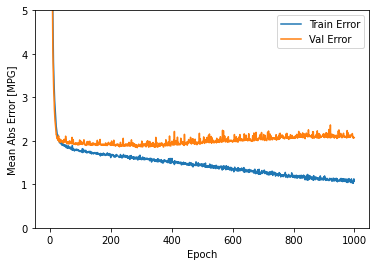

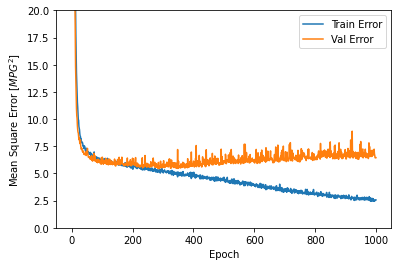

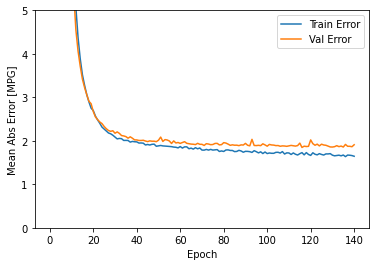

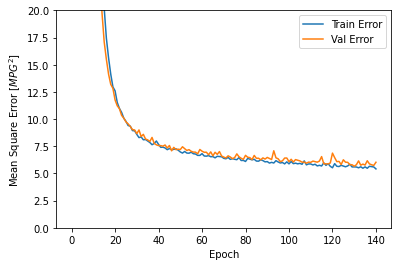

In [1]:
from __future__ import absolute_import, division, print_function

import pandas as pd

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


#print(tf.__version__)

dataset_path = keras.utils.get_file("auto-mpg.data",
                                    "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")

column_names = ["MPG",
                "Cylinders",
                "Displacement",
                "Horsepower",
                "Weight",
                "Acceleration",
                "Model Year",
                "Origin"]

raw_dataset = pd.read_csv(dataset_path,
                          names=column_names,
                          na_values="?",
                          comment="\t",
                          sep=" ",
                          skipinitialspace=True)

dataset = raw_dataset.copy()
#print(dataset.tail())
#print(dataset.isna().sum())

dataset = dataset.dropna()

origin = dataset.pop("Origin")

dataset["USA"] = (origin == 1) * 1.0
dataset["Europe"] = (origin == 2) * 1.0
dataset["Japan"] = (origin == 3) * 1.0

#train_dataset = dataset.sample(frac=0.8, random_state=0)
#test_dataset = dataset.drop(train_dataset.index)

X = dataset.drop(columns=["MPG"])
y = dataset["MPG"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

train_stats = X_train.describe()
train_stats = train_stats.transpose()

def normalize(x):
    return (x - train_stats["mean"]) / train_stats["std"]


X_train = normalize(X_train)
X_test = normalize(X_test)

def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation="relu", input_shape=[len(X.keys())]),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)
        ])
    optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001)

    model.compile(loss="mse",
                  optimizer=optimizer,
                  metrics=["mae", "mse"])
    return model

model = build_model()

#example_batch = X_train[:10]
#example_result = model.predict(example_batch)
#print(example_result)

EPOCHS = 1000

history = model.fit(X_train,
                    y_train,
                    epochs=EPOCHS,
                    validation_split=0.2,
                    verbose=1)

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist["epoch"] = history.epoch
    
    plt.figure()
    plt.xlabel("Epoch")
    plt.ylabel("Mean Abs Error [MPG]")
    plt.plot(hist["epoch"], hist["mae"], label="Train Error")
    plt.plot(hist["epoch"], hist["val_mae"], label="Val Error")
    plt.ylim([0, 5])
    plt.legend()
    
    plt.figure()
    plt.xlabel("Epoch")
    plt.ylabel("Mean Square Error [$MPG^2$]")
    plt.plot(hist["epoch"], hist["mse"], label="Train Error")
    plt.plot(hist["epoch"], hist["val_mse"], label="Val Error")
    plt.ylim([0, 20])
    plt.legend()
    plt.show()

plot_history(history)

model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor="val_loss", patience=10)

history = model.fit(X_train, y_train, epochs=EPOCHS,
                    validation_split=0.2, verbose=0, callbacks=[early_stop])

plot_history(history)

#print(model.predict(X_test[0:10]))
#print(y_test[0:10])